In [1]:
import urllib.request
import urllib.parse
from urllib.parse import urlparse
from PIL import Image
from urllib.request import urlopen
from bs4 import BeautifulSoup
import random
import IPython
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
import cv2
import sys
from google.colab.patches import cv2_imshow
import pandas as pd
import plotly.io as pio
# Import plotly - a library for graphing in python
import plotly.graph_objects as go
# Import scikit-learn, a machine learning library.
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#Do we want to ask the user to input the website? That would be cool!

#open the website
htmldata = urlopen('https://people.com/')
soup = BeautifulSoup(htmldata, 'html.parser')
images = soup.find_all('img')

#create an place to store the image urls
urls = []
# make the intial list of the valid and invalid URLS
for item in images:
  if 'svg' in item['src']:
    pass
  else:
     urls.append(item['src'])

In [3]:


# Retrieving the resource located at the URL and storing it in the file name n.png

#limit 10 for computing  speed issues. Remove the line below if you want all images! 
urls = urls[:10]
for i,item in enumerate(urls):
  urllib.request.urlretrieve(item, str(i)+".png")   
  # Opening the image and displaying it (to confirm its presence)
  img = Image.open(str(i)+".png")
  #Do we want to print the image? It slows the program down dramatically!
  #img.show()


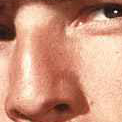

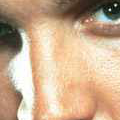

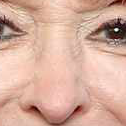

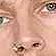

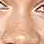

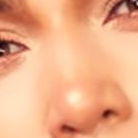

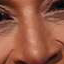

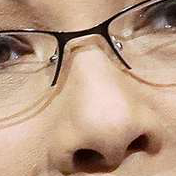

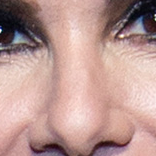

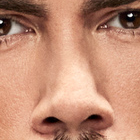

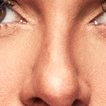

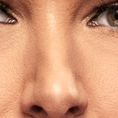

In [4]:
#this only works for png currently, I think. Cannot figure out why!

cascPath = "/content/haarcascade_frontalface_default.xml"
face_num = 1
# Get user supplied values
for i,item in enumerate(urls):
  imagePath = "/content/"+str(i)+".png"


# Create the haar cascade. Don't forget to upload file!
  faceCascade = cv2.CascadeClassifier(cascPath)

# Read the image
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
  faces = faceCascade.detectMultiScale(
      gray,
      scaleFactor= 1.33,
      minNeighbors=5,
      minSize=(30, 30)
      #flags = cv2.CV_HAAR_SCALE_IMAGE
  )

#The print statements below are for error checking.
  #print("Found {0} faces!".format(len(faces)))
  #print(faces)
  img = Image.open(str(i)+".png")
  # Draw a rectangle around the faces (if you don't want to crop)
  for (x, y, w, h) in faces:
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 0), 10)

      center_x = (x + x + w) // 2
      center_y = (y + y + h) // 2
    #Crop the Image

      # Setting the points for cropped image
      left = center_x-w/6
      upper = center_y-h/6
      right = center_x+w/6
      lower = center_y+h/6
      
      # Cropped image of above dimension
      im = img.crop((left, upper, right, lower))

      #overwrite original photo with crop (do we want to do this? no, hence the x)
      #Create a new file name as #X#.png
      im.save(str(i)+"x"+str(face_num)+".png")
      face_num +=1
      # Shows the image in image viewer, might not want this during the program for computing issues
      im.show()
  #cv2_imshow( image)

  # cv2.waitKey(0)

[(218, 160, 110), (225, 168, 159), (234, 185, 178), (230, 184, 158), (213, 137, 103), (132, 52, 41), (186, 164, 143), (229, 185, 172), (28, 48, 75), (141, 85, 70), (251, 198, 164), (228, 160, 121)]


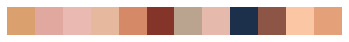

In [5]:
#loop through every image
palette = []
for j in range(face_num):
  for i in range(len(urls)):
    #error catching 
    try:
      #open.load the image
      img = Image.open(str(i)+"x"+str(j)+".png")
      pix = img.load()
      X,Y = img.size #set the length and width of the image to a variable
      rgb_data = pix[random.randint(0,X-1),random.randint(0,Y-1)] #randomly select a pixel in the image
      palette.append(rgb_data) #add pixel data to our list
    except:
      pass
#Is this necessary? Why is this here?
del palette[0]


# Get the RGBA Value of the a pixel of an image
print(palette)

#print the color of the pixel
palette1 = np.array(palette)[np.newaxis, :, :]

#Display select pixel color palette
plt.imshow(palette1)
plt.axis('off')
plt.show()

In [6]:
#Convert data types. Is this necessary? It throws errors without it. 
red = []
green = []
blue = []
for i in range(len(palette)):
    red.append(palette[i][0])
    green.append(palette[i][1])
    blue.append(palette[i][2])
#convert to dictionary 
Dict = {'Red':tuple(red), 'Green':green, 'Blue':blue, 'Color': palette[:]}
#convert dictionary to list
points = pd.DataFrame.from_dict(Dict)


In [7]:
#Create 3d Scatterplot in Plotly

def create_3d_scatter(selected_points, plt_name):
  fig = go.Figure()
  print(points['Red'])
  # Create 3D scatter plot.
  fig.add_trace(dict(type='scatter3d',
                x=selected_points['Red'],
                y=selected_points['Green'],
                z=selected_points['Blue'],
                mode='markers',
                marker=dict(color=list(palette),
                            size=10,line=dict(width=2,
                                        color='DarkSlateGrey'))
  ))
 
  # Set axis labels and dimensions.
  fig.update_layout(
      title = plt_name,
      scene = dict(
                    xaxis_title='RED',
                    yaxis_title='GREEN',
                    zaxis_title='BLUE',
                    xaxis = dict(nticks=4, range=[0,255],),
                    yaxis = dict(nticks=4, range=[0,255],),
                    zaxis = dict(nticks=4, range=[0,255],))) 
  return fig  

#Diplay 3d scatterplot
fig = create_3d_scatter(points, "3D Scatter")
pio.show(fig)

0     218
1     225
2     234
3     230
4     213
5     132
6     186
7     229
8      28
9     141
10    251
11    228
Name: Red, dtype: int64


In [8]:
# Load our classifier. 
num_clusters = 2 # You can change this if you want more/less than 5 bins!

# Fit to our data.
kmeans_cluster = KMeans(n_clusters=num_clusters, random_state=0)
clusters_fitted = kmeans_cluster.fit(points[['Red','Green','Blue']])
print(kmeans_cluster.cluster_centers_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[[100.33333333  61.66666667  62.        ]
 [223.77777778 171.22222222 145.33333333]]


In [16]:

kmeans_cluster = clusters_fitted
# Turn cluster centers into a color and sort by hue.
cluster_center_colors = []

def luminance_of_color(r,g,b):
  """ Luminance is a perceived brightness of an RGB color. """
  return 0.2126*r + 0.7152*g + 0.0722*b
cluster_center_order = []
cluster_center_order_map = {}

# Loop through each color
for current_index, color in enumerate(kmeans_cluster.cluster_centers_):
  r, g, b = color
  color_tuple = (int(r)/255,int(g)/255,int(b)/255)
  # Add the color to the bin.
  cluster_center_colors.append((
      luminance_of_color(r,g,b),
      current_index,
      (int(r)/255,int(g)/255,int(b)/255)
  ))
  cluster_center_order.append((r**2 + g**2 + b**2, len(cluster_center_order)))


# Create mapping from original index order to new sorted cluster.
cluster_colors = []
for new_index, ordering in enumerate(cluster_center_colors):
  _, old_index, color, = ordering
  cluster_colors.append(color)
  cluster_center_order_map[old_index] = new_index


In [19]:
#Change markers for cluster centers (if desired)
markers = ['circle','x','diamond','cross','square']

# Add cluster centers to scatter.
clusters = pd.DataFrame(clusters_fitted.cluster_centers_,
                        columns=['red','green','blue'])

fig = create_3d_scatter(points, "Clusters Scatter")

#Add the cluster centroids 
fig.add_trace(dict(type='scatter3d',
          x=clusters['red'],
          y=clusters['green'],
          z=clusters['blue'],
          mode = 'markers', #no line connecting the centroids
          marker=dict(      #set the centroid marker style
                    color = cluster_colors,
                    size=15,
                    symbol = 'diamond', #change centroid markers
                    line=dict(width=10,color='black')
)))
#     #Do you want a different marker for each cluster center? Use this code
# for i in range(len(clusters)):
#   #print(cluster_colors[i].type)
#   print(cluster_colors)
#   fig.add_trace(dict(type='scatter3d',
#             x=np.array(clusters.iloc[i][0]), #red
#             y=np.array(clusters.iloc[i][1]), #green
#             z=np.array(clusters.iloc[i][2]), #blue
#             mode = 'markers', #no line connecting the centroids
#             marker=dict(      #set the centroid marker style
#                       color = cluster_colors[i],
#                       size=10,
#                       symbol = markers[i], #change centroid markers
#                       line=dict(width=10,color='black')
#   )))
#   #change marker type to match centroid marker
#  #fig.update_trace()

#show 3d scatterplot with cluster centers
pio.show(fig)

0     218
1     225
2     234
3     230
4     213
5     132
6     186
7     229
8      28
9     141
10    251
11    228
Name: Red, dtype: int64


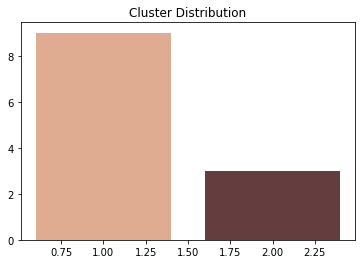

In [20]:

# Create mapping from original index order to new sorted cluster.
cluster_colors = []
for new_index, ordering in enumerate(sorted(cluster_center_colors, reverse=True)):
  _, old_index, color, = ordering
  cluster_colors.append(color)
  cluster_center_order_map[old_index] = new_index

# Count number of points in each cluster.
tones_by_clusters = kmeans_cluster.predict(points[['Red','Green','Blue']])
cluster_counts = [0] * num_clusters
for x in tones_by_clusters:
  cluster_counts[cluster_center_order_map[x]] += 1

# Visualize.
import matplotlib.pyplot as plt 
plt.bar(list(range(1, num_clusters + 1)), cluster_counts, color=cluster_colors)
plt.title("Cluster Distribution")
plt.show()